In [23]:
# 패키지 임포트
import numpy as np
import pandas as pd
import scipy.stats as ss
import os 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import LabelEncoder
from datetime import datetime
# !pip install plotly
import plotly.offline as off
import plotly.graph_objs as go
pd.set_option('display.max_columns', 500)

plt.rc("font", family="Malgun Gothic") # matplotlib 한글깨짐 방지

In [24]:
# 데이터 로드
# 부동산 데이터
estate_price_2018 = pd.read_csv('estate_price_2018.csv', encoding='cp949')
estate_price_2019 = pd.read_csv('estate_price_2019.csv', encoding='cp949')
estate_price_2020 = pd.read_csv('estate_price_2020.csv', encoding='cp949')
# train_data=pd.read_csv('train_data.csv', encoding='cp949')

# 역 데이터
station = pd.read_excel('서울교통공사_역주소현황(행정동기준)_20201109.xlsx')

# 학원 데이터
cram_school_data=pd.read_csv('학원데이터.csv', encoding='cp949')

In [25]:
estate_price_2018

,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,해제사유발생일,거래유형,중개사소재지
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,201801,3,"130,000",4,1987,언주로 3,NaN,-,-
1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,201801,8,"117,000",2,1987,언주로 3,NaN,-,-
2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,201801,11,"130,000",1,1987,언주로 3,NaN,-,-
3,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,201803,19,"139,500",2,1987,언주로 3,NaN,-,-
4,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,54.98,201804,5,"107,500",5,1987,언주로 3,NaN,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81598,서울특별시 중랑구 중화동,274-76,274.0,76.0,한영(103),56.52,201809,22,"21,000",5,2003,동일로144길 74,NaN,-,-
81599,서울특별시 중랑구 중화동,274-76,274.0,76.0,한영(103),69.52,201811,1,"29,500",3,2003,동일로144길 74,NaN,-,-
81600,서울특별시 중랑구 중화동,274-76,274.0,76.0,한영(103),69.09,201811,12,"30,000",5,2003,동일로144길 74,NaN,-,-
81601,서울특별시 중랑구 중화동,274-77,274.0,77.0,한영(104),75.88,201808,29,"24,500",2,2003,동일로144길 74,NaN,-,-


In [26]:
# train data 생성 위한 전처리 수행
train_data = pd.concat([estate_price_2018, estate_price_2019, estate_price_2020])
train_data

train_data.drop(['번지', '본번', '부번','해제사유발생일', '거래유형', '중개사소재지'], inplace=True, axis=1)
train_data.drop(['도로명'], inplace=True, axis=1)
# train_data.to_csv('projectDataset/main data from seoul/train_data.csv', index=False, encoding='utf-8-sig')

In [27]:
train_data.columns

Index(['시군구', '단지명', '전용면적(㎡)', '계약년월', '계약일', '거래금액(만원)', '층', '건축년도'], dtype='object')

In [28]:
# train_data.columns = ['sigungu', 'danji', 'area', 'transaction_year_month','transaction_day', 
#                       'price', 'floor', 'completion_year']

In [29]:
train_data

,시군구,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도
0,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,3,"130,000",4,1987
1,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,8,"117,000",2,1987
2,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,11,"130,000",1,1987
3,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201803,19,"139,500",2,1987
4,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,54.98,201804,5,"107,500",5,1987
...,...,...,...,...,...,...,...,...
84234,서울특별시 중랑구 중화동,한영(104),67.57,202008,7,"26,000",2,2003
84235,서울특별시 중랑구 중화동,현대휴앤미,95.94,202007,10,"44,000",6,2007
84236,서울특별시 중랑구 중화동,현대휴앤미,100.17,202012,3,"54,800",5,2007
84237,서울특별시 중랑구 중화동,현대휴앤미(102동),77.71,202009,28,"40,000",5,2007


In [30]:
# 중복값 확인
train_data[train_data.duplicated(keep=False)]

,시군구,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도
2478,서울특별시 강남구 압구정동,한양6,106.71,201807,26,"220,000",9,1980
2479,서울특별시 강남구 압구정동,한양6,106.71,201807,26,"220,000",9,1980
2480,서울특별시 강남구 압구정동,한양6,106.71,201808,2,"224,000",9,1980
2481,서울특별시 강남구 압구정동,한양6,106.71,201808,2,"224,000",9,1980
3242,서울특별시 강남구 자곡동,래미안강남힐즈,91.96,201801,8,"115,000",9,2014
...,...,...,...,...,...,...,...,...
84205,서울특별시 중랑구 중화동,한신1차,84.87,202012,9,"75,000",3,1997
84206,서울특별시 중랑구 중화동,한신1차,59.76,202012,11,"62,500",19,1997
84207,서울특별시 중랑구 중화동,한신1차,59.76,202012,11,"62,500",19,1997
84237,서울특별시 중랑구 중화동,현대휴앤미(102동),77.71,202009,28,"40,000",5,2007


In [31]:
# 중복값 삭제
train_data.drop_duplicates(inplace=True)

In [32]:
train_data

,시군구,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도
0,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,3,"130,000",4,1987
1,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,8,"117,000",2,1987
2,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,11,"130,000",1,1987
3,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201803,19,"139,500",2,1987
4,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,54.98,201804,5,"107,500",5,1987
...,...,...,...,...,...,...,...,...
84233,서울특별시 중랑구 중화동,한영(104),106.21,202003,11,"45,400",6,2003
84234,서울특별시 중랑구 중화동,한영(104),67.57,202008,7,"26,000",2,2003
84235,서울특별시 중랑구 중화동,현대휴앤미,95.94,202007,10,"44,000",6,2007
84236,서울특별시 중랑구 중화동,현대휴앤미,100.17,202012,3,"54,800",5,2007


### 거래금액 컬럼
- 컬럼명 변경, 숫자형으로 변경
- 거래금액/전용면적

In [33]:
#### 전처리
## 거래금액
# 거래금액 데이터 컬럼명 변경
train_data.rename(columns = {'거래금액(만원)':'거래금액'}, inplace=True)

# 거래금액 , 제거 후 숫자형 변환
train_data['거래금액'] = train_data['거래금액'].str.replace(',','').astype(int)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='거래금액', ylabel='Density'>

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning:

Glyph 8722 missing from current font.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning:

Glyph 8722 missing from current font.



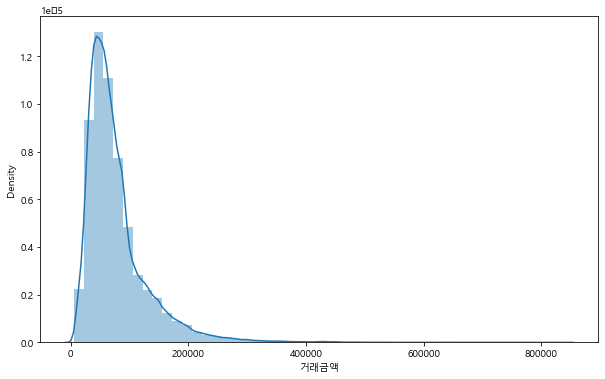

In [34]:
# 거래 가격 분포 확인
f, ax = plt.subplots(figsize = (10, 6)) 
sns.distplot(train_data["거래금액"])

### 제곱미터 단가

In [35]:
train_data.rename(columns = {'전용면적(㎡)':'전용면적'}, inplace=True)

In [36]:
# 거래금액을 전용면적으로 나누기 -> 면적당 금액
train_data['제곱미터단가']= train_data['거래금액']/train_data['전용면적']
train_data['평당단가']= train_data['제곱미터단가']*3.3
train_data

,시군구,단지명,전용면적,계약년월,계약일,거래금액,층,건축년도,제곱미터단가,평당단가
0,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,3,130000,4,1987,1625.609604,5364.511692
1,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,8,117000,2,1987,1463.048643,4828.060523
2,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,11,130000,1,1987,1625.609604,5364.511692
3,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201803,19,139500,2,1987,1744.404152,5756.533700
4,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,54.98,201804,5,107500,5,1987,1955.256457,6452.346308
...,...,...,...,...,...,...,...,...,...,...
84233,서울특별시 중랑구 중화동,한영(104),106.21,202003,11,45400,6,2003,427.455042,1410.601638
84234,서울특별시 중랑구 중화동,한영(104),67.57,202008,7,26000,2,2003,384.786148,1269.794287
84235,서울특별시 중랑구 중화동,현대휴앤미,95.94,202007,10,44000,6,2007,458.619971,1513.445904
84236,서울특별시 중랑구 중화동,현대휴앤미,100.17,202012,3,54800,5,2007,547.069981,1805.330937


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='제곱미터단가', ylabel='Density'>

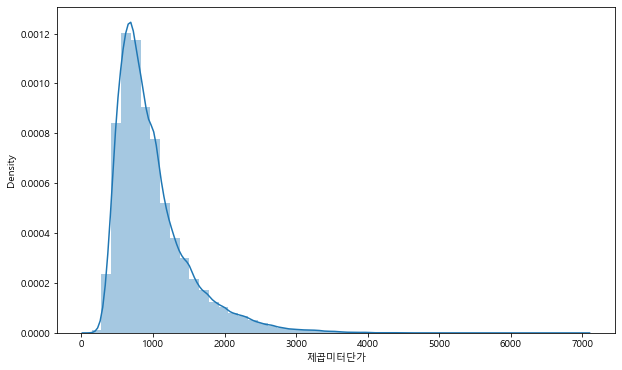

In [37]:
# 거래 가격 분포 확인
f, ax = plt.subplots(figsize = (10, 6)) 
sns.distplot(train_data["평당단가"])

### 시군구 컬럼
- 시, 구, 동으로 분리
- 인코딩

In [38]:
region_split = train_data['시군구'].str.split(' ', expand=True)
region_split.columns = ['시', '구', '동']

train_data = pd.concat([train_data, region_split], axis=1)
train_data

,시군구,단지명,전용면적,계약년월,계약일,거래금액,층,건축년도,제곱미터단가,평당단가,시,구,동
0,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,3,130000,4,1987,1625.609604,5364.511692,서울특별시,강남구,개포동
1,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,8,117000,2,1987,1463.048643,4828.060523,서울특별시,강남구,개포동
2,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,11,130000,1,1987,1625.609604,5364.511692,서울특별시,강남구,개포동
3,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201803,19,139500,2,1987,1744.404152,5756.533700,서울특별시,강남구,개포동
4,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,54.98,201804,5,107500,5,1987,1955.256457,6452.346308,서울특별시,강남구,개포동
...,...,...,...,...,...,...,...,...,...,...,...,...,...
84233,서울특별시 중랑구 중화동,한영(104),106.21,202003,11,45400,6,2003,427.455042,1410.601638,서울특별시,중랑구,중화동
84234,서울특별시 중랑구 중화동,한영(104),67.57,202008,7,26000,2,2003,384.786148,1269.794287,서울특별시,중랑구,중화동
84235,서울특별시 중랑구 중화동,현대휴앤미,95.94,202007,10,44000,6,2007,458.619971,1513.445904,서울특별시,중랑구,중화동
84236,서울특별시 중랑구 중화동,현대휴앤미,100.17,202012,3,54800,5,2007,547.069981,1805.330937,서울특별시,중랑구,중화동


In [39]:
# 구별 거래 횟수
train_data.groupby('구').count()['거래금액']

구
강남구     11849
강동구     12052
강북구      5485
강서구     14659
관악구      7805
광진구      4423
구로구     12977
금천구      4552
노원구     24724
도봉구     11356
동대문구     8889
동작구      8262
마포구      8608
서대문구     8006
서초구      9542
성동구      9019
성북구     12996
송파구     14929
양천구     11170
영등포구     9785
용산구      4706
은평구      9067
종로구      2092
중구       3275
중랑구      7954
Name: 거래금액, dtype: int64

In [40]:
# 구별 거래 금액
train_data.groupby('구').mean().sort_values('거래금액', ascending=False)['거래금액']

구
강남구     172389.832982
서초구     162562.396143
용산구     144753.982788
송파구     116834.927189
성동구      98045.302805
광진구      92582.478861
마포구      90321.685525
동작구      84743.921206
중구       79739.880611
양천구      79507.519785
영등포구     78298.655902
종로구      75092.054015
강동구      74854.759625
서대문구     67934.167874
강서구      60731.687359
동대문구     60424.357521
성북구      58470.971761
은평구      54875.648395
관악구      54058.405125
구로구      49741.599908
강북구      48765.654512
노원구      45296.524834
중랑구      45132.519236
금천구      43475.700571
도봉구      40920.243748
Name: 거래금액, dtype: float64

In [41]:
# 구별 거래횟수

cnt_gu= train_data.groupby('구').count().sort_values('시군구', ascending=False)

gu_fig = go.Figure()
gu_trace = go.Bar(x=cnt_gu.index, y=cnt_gu['시군구'])
gu_fig.add_trace(gu_trace)

gu_fig.update_layout(
    title='구별 거래 횟수',
    xaxis_title='구',
    yaxis_title='거래횟수',
#     yaxis_tickformat='(만원)',
    autosize=False,
    width=1200,
    height=1000
)

gu_fig.show()

In [42]:
# 구별 평균 거래금액

mean_by_gu = train_data.groupby(['구']).mean()
mean_by_gu

,전용면적,계약년월,계약일,거래금액,층,건축년도,제곱미터단가,평당단가
구,,,,,,,,
강남구,91.539864,201908.247109,15.804118,172389.832982,9.304329,1997.701494,1959.311919,6465.729333
강동구,75.696313,201909.890724,15.736973,74854.759625,9.474693,2001.550282,1018.142030,3359.868698
강북구,75.716059,201908.780492,15.942388,48765.654512,9.340747,2003.437739,669.011870,2207.739172
강서구,73.347080,201910.592401,16.156696,60731.687359,7.829047,2001.085272,853.286623,2815.845855
관악구,74.619934,201903.714798,15.955926,54058.405125,9.377578,2001.067905,754.041828,2488.338032
광진구,85.613370,201902.048836,15.695682,92582.478861,10.412842,1998.595297,1105.629567,3648.577571
구로구,72.608506,201909.509132,15.816522,49741.599908,9.720274,1999.463512,692.820869,2286.308867
금천구,73.135042,201905.664104,15.478691,43475.700571,9.630931,2001.089851,619.838108,2045.465758
노원구,64.625151,201907.992760,16.006593,45296.524834,8.081257,1993.870692,718.582928,2371.323664


In [43]:
# 구별 평균 거래금액
df = mean_by_gu.reset_index()
sorted_df = df[['구', '거래금액']].sort_values('거래금액', ascending=False)
gu_list = list(sorted_df['구'].values)

region_mean_fig = go.Figure()

trace_mean_list = []
for gu in gu_list:
    trace_region = go.Bar(x=df[df['구'] == gu]['구'], y=df[df['구'] == gu]['거래금액'], name=gu)
    trace_mean_list.append(trace_region)

region_mean_fig.add_traces(trace_mean_list)

region_mean_fig.update_layout(
    title='구별 평균 거래금액(2018~2020)',
    xaxis_title='구',
    yaxis_title='거래금액',
    yaxis_tickformat='(만원)',
    autosize=False,
    width=1200,
    height=1000
)

region_mean_fig.show()

In [44]:
train_data

,시군구,단지명,전용면적,계약년월,계약일,거래금액,층,건축년도,제곱미터단가,평당단가,시,구,동
0,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,3,130000,4,1987,1625.609604,5364.511692,서울특별시,강남구,개포동
1,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,8,117000,2,1987,1463.048643,4828.060523,서울특별시,강남구,개포동
2,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,11,130000,1,1987,1625.609604,5364.511692,서울특별시,강남구,개포동
3,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201803,19,139500,2,1987,1744.404152,5756.533700,서울특별시,강남구,개포동
4,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,54.98,201804,5,107500,5,1987,1955.256457,6452.346308,서울특별시,강남구,개포동
...,...,...,...,...,...,...,...,...,...,...,...,...,...
84233,서울특별시 중랑구 중화동,한영(104),106.21,202003,11,45400,6,2003,427.455042,1410.601638,서울특별시,중랑구,중화동
84234,서울특별시 중랑구 중화동,한영(104),67.57,202008,7,26000,2,2003,384.786148,1269.794287,서울특별시,중랑구,중화동
84235,서울특별시 중랑구 중화동,현대휴앤미,95.94,202007,10,44000,6,2007,458.619971,1513.445904,서울특별시,중랑구,중화동
84236,서울특별시 중랑구 중화동,현대휴앤미,100.17,202012,3,54800,5,2007,547.069981,1805.330937,서울특별시,중랑구,중화동


In [45]:
# 거래금액, 시군구까지 저장
train_data.to_csv('train_data.csv', encoding='utf-8-sig', index=False)
print('train_data.csv , 거래금액, 시군구 데이터가 csv로 저장되었습니다.')

train_data.csv , 거래금액, 시군구 데이터가 csv로 저장되었습니다.


### 단지명

In [46]:
# 브랜드 평판 top24 시공사로 범주 축소
# 2021.09.16 시공사 브랜드평판 순위 참고 링크: http://brikorea.com/bbs/board.php?bo_table=rep_1&wr_id=701

train_data['단지명브랜드'] = '기타'
top_brand = ['현대', '힐스테이트', 'GS','자이', '롯데','롯데캐슬', '포스코|더샵', '대우','푸르지오','삼성', '래미안', 
             '아이파크', 'sk|SK|에스케이', '이편한|e편한|e-편한', 
             '쌍용', '플래티넘', '호반', '서희|서희스타힐스', '한라|한라비발디', '우미','우미린',
             '동부','센트레빌', '태영', '데시앙', '두산|두산위브', '벽산', '벽산블루밍', '한화', 
             '동문', '코오롱','하늘채', '코아루', '계룡', '리슈빌', 'KCC','스위첸']

# top 10 시공사에 속해 있는 아파트면 해당 시공사 이름으로 top10 컬럼 값 할당
for brand in top_brand:
    train_data.loc[train_data['단지명'].str.contains(brand), '단지명브랜드'] = brand

# top10 시공사에 속하는 아파트 단지 탐색
train_data['단지명브랜드'].value_counts()


기타              148872
현대               17712
래미안              13880
푸르지오              5738
힐스테이트             5388
두산|두산위브           5114
삼성                4632
이편한|e편한|e-편한      4436
자이                4170
벽산                3905
롯데캐슬              3896
아이파크              3086
sk|SK|에스케이        2351
대우                2284
쌍용                2271
센트레빌              2133
포스코|더샵            1141
한화                1133
데시앙                877
코오롱                822
롯데                 729
벽산블루밍              688
태영                 635
동부                 546
하늘채                343
한라|한라비발디           180
서희|서희스타힐스          176
리슈빌                175
KCC                148
GS                 134
플래티넘               124
스위첸                117
코아루                 97
우미                  90
호반                  75
계룡                  45
동문                  39
Name: 단지명브랜드, dtype: int64

In [47]:
train_data

,시군구,단지명,전용면적,계약년월,계약일,거래금액,층,건축년도,제곱미터단가,평당단가,시,구,동,단지명브랜드
0,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,3,130000,4,1987,1625.609604,5364.511692,서울특별시,강남구,개포동,기타
1,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,8,117000,2,1987,1463.048643,4828.060523,서울특별시,강남구,개포동,기타
2,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,11,130000,1,1987,1625.609604,5364.511692,서울특별시,강남구,개포동,기타
3,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201803,19,139500,2,1987,1744.404152,5756.533700,서울특별시,강남구,개포동,기타
4,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,54.98,201804,5,107500,5,1987,1955.256457,6452.346308,서울특별시,강남구,개포동,기타
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84233,서울특별시 중랑구 중화동,한영(104),106.21,202003,11,45400,6,2003,427.455042,1410.601638,서울특별시,중랑구,중화동,기타
84234,서울특별시 중랑구 중화동,한영(104),67.57,202008,7,26000,2,2003,384.786148,1269.794287,서울특별시,중랑구,중화동,기타
84235,서울특별시 중랑구 중화동,현대휴앤미,95.94,202007,10,44000,6,2007,458.619971,1513.445904,서울특별시,중랑구,중화동,현대
84236,서울특별시 중랑구 중화동,현대휴앤미,100.17,202012,3,54800,5,2007,547.069981,1805.330937,서울특별시,중랑구,중화동,현대


In [48]:
train_data['단지명브랜드'].nunique()

37

In [49]:
# 전체 데이터에서 37% 정도 차지
sum(train_data['단지명브랜드']!='기타')/train_data.shape[0]

0.3749653626218606

#### 단지명브랜드 EDA

In [50]:
# 단지명브랜드별 평균 거래금액

mean_by_aptbrand = train_data.groupby(['단지명브랜드']).mean()
mean_by_aptbrand

,전용면적,계약년월,계약일,거래금액,층,건축년도,제곱미터단가,평당단가
단지명브랜드,,,,,,,,
GS,57.840522,201915.179104,14.305970,61292.537313,11.231343,2003.664179,975.386409,3218.775151
KCC,87.845473,201916.317568,16.148649,94906.756757,13.574324,2006.993243,1100.200430,3630.661420
sk|SK|에스케이,83.380053,201907.962994,16.308379,66325.229689,11.675032,2005.017865,812.708225,2681.937142
계룡,71.930667,201898.022222,16.555556,51975.555556,9.644444,1998.977778,725.543952,2394.295042
기타,74.410862,201907.383900,15.830949,71544.785138,8.443482,1997.941218,953.565131,3146.764932
대우,75.375579,201904.352452,15.749562,69093.142732,10.802977,2000.108144,941.861218,3108.142021
데시앙,80.361433,201898.596351,15.291904,73712.713797,8.873432,2006.659065,924.677971,3051.437303
동문,83.142564,201926.384615,14.846154,43643.589744,6.794872,1998.333333,548.878418,1811.298778
동부,78.157115,201903.560440,15.630037,48843.446886,9.000000,1998.199634,642.904771,2121.585743


In [51]:
# 단지명브랜드별 평균 거래금액
df = mean_by_aptbrand.reset_index()
sorted_df = df[['단지명브랜드', '거래금액']].sort_values('거래금액', ascending=False)
aptbrand_list = list(sorted_df['단지명브랜드'].values)

region_mean_fig = go.Figure()

trace_mean_list = []
for aptbrand in aptbrand_list:
    trace_region = go.Bar(x=df[df['단지명브랜드'] == aptbrand]['단지명브랜드'], y=df[df['단지명브랜드'] == aptbrand]['거래금액'], name=aptbrand)
    trace_mean_list.append(trace_region)

region_mean_fig.add_traces(trace_mean_list)

region_mean_fig.update_layout(
    title='단지명브랜드별 평균 거래금액(2018~2020)',
    xaxis_title='단지명브랜드',
    yaxis_title='거래금액',
    yaxis_tickformat='(만원)',
    autosize=False,
    width=1200,
    height=1000
)

region_mean_fig.show()

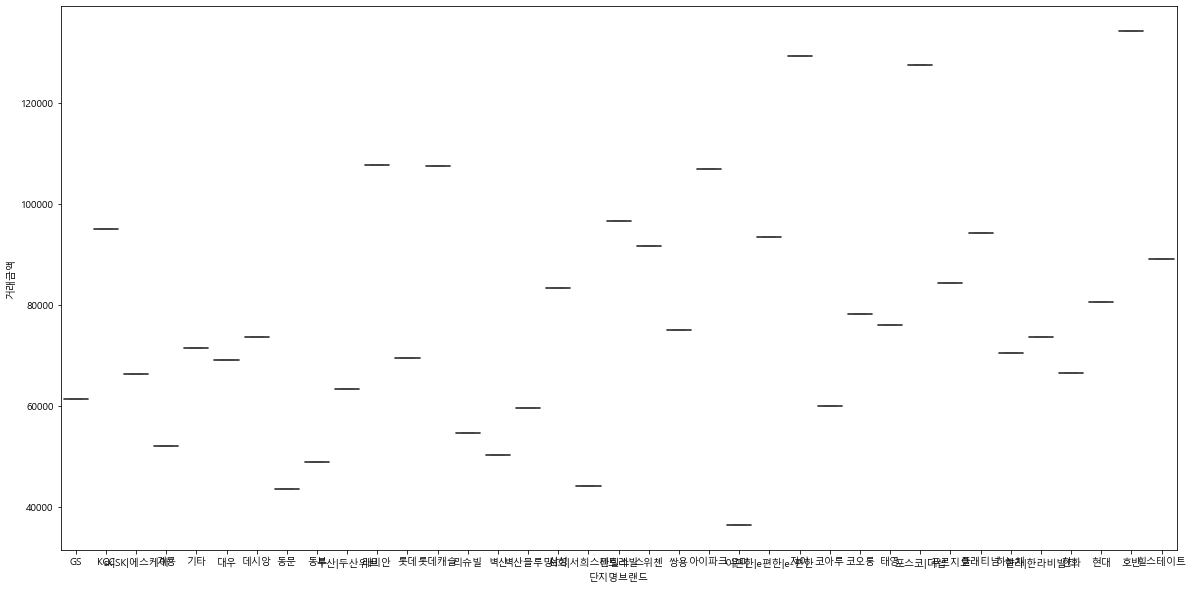

In [52]:
df = mean_by_aptbrand.reset_index()
# col_list=[df['단지명브랜드'],df['전용면적']]
plt.figure(figsize=(20,10))
sns.boxplot(x='단지명브랜드',y='거래금액',  data=df)
plt.show()

In [53]:
# 단지명브랜드까지 저장
train_data.to_csv('train_data.csv', encoding='utf-8-sig', index=False)
print('train_data.csv , 단지명브랜드까지 csv로 저장되었습니다.')

train_data.csv , 단지명브랜드까지 csv로 저장되었습니다.


### 층 컬럼
- 이상치 : 음수 값 -> 70개로 전체의 0.03%이므로 삭제
- 로그변환 컬럼 생성(모형에 적용한 경우와 아닌 경우 성능 비교)

4     16895
5     16800
3     16580
2     15986
6     15614
      ...  
61        2
59        2
57        2
68        1
69        1
Name: 층, Length: 71, dtype: int64


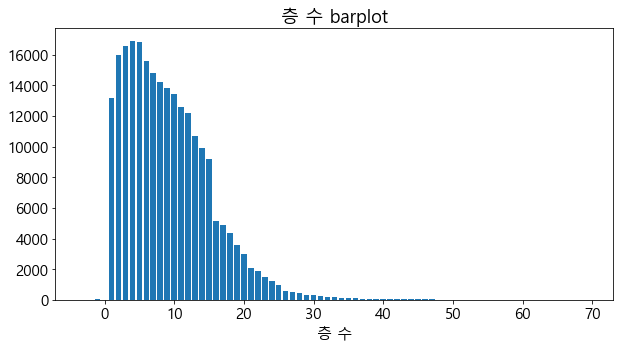

In [54]:
# 거래 가격 분포 확인
print(train_data['층'].value_counts())
fig=plt.figure(figsize=(10, 5))
plt.rc('font', size=15)
plt.bar(train_data['층'].value_counts().index.unique(), train_data['층'].value_counts())
plt.title('층 수 barplot')
plt.xlabel('층 수')
plt.show()

In [55]:
# 층 중 음수 개수 : 70개, 전체의 약 0.03%
sum(train_data['층']<=0)

69

In [56]:
# 층 중 음수 개수 확인
train_data.loc[train_data['층']<0,'층'].value_counts()

-1    52
-2    13
-3     4
Name: 층, dtype: int64

In [57]:
## 이상치 삭제
train_data.drop(train_data.loc[train_data['층']<0].index, inplace=True)

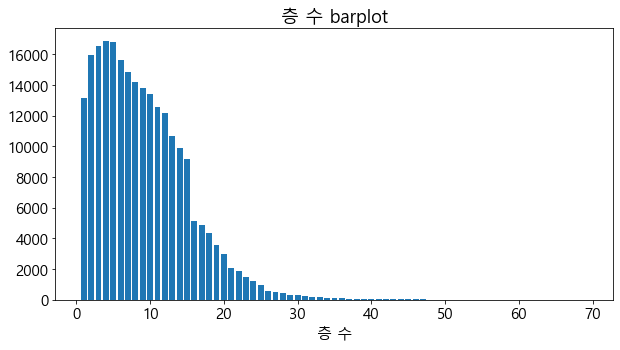

In [58]:
# 거래 가격 분포 확인
fig=plt.figure(figsize=(10, 5))
plt.rc('font', size=15)
plt.bar(train_data['층'].value_counts().index.unique(), train_data['층'].value_counts())
plt.title('층 수 barplot')
plt.xlabel('층 수')
plt.show()

In [59]:
# 층까지 저장
train_data.to_csv('train_data.csv', encoding='utf-8-sig', index=False)
print('train_data.csv , 층까지 csv로 저장되었습니다.')

train_data.csv , 층까지 csv로 저장되었습니다.


### 계약년월
- 인코딩 : 연속적이나 구간이 일정한 추세 t를 변수로 포함 https://be-favorite.tistory.com/86
- 계약날짜로 변환

In [60]:
train_data.describe()

,전용면적,계약년월,계약일,거래금액,층,건축년도,제곱미터단가,평당단가
count,237995.000000,237995.000000,237995.000000,237995.000000,237995.000000,237995.000000,237995.000000,237995.000000
mean,78.110023,201906.973878,15.832194,77518.326011,9.128818,2000.172739,990.132216,3267.436313
std,30.264553,83.356822,8.697208,54457.670763,6.168803,9.626455,517.891398,1709.041612
min,10.321500,201801.000000,1.000000,5400.000000,1.000000,1961.000000,143.143430,472.373318
25%,59.730000,201808.000000,8.000000,43000.000000,4.000000,1994.000000,638.204225,2106.073944
50%,83.580000,201909.000000,16.000000,63000.000000,8.000000,2001.000000,852.073379,2811.842149
75%,84.970000,202005.000000,23.000000,92000.000000,13.000000,2007.000000,1179.709661,3893.041882
max,395.060000,202012.000000,31.000000,840000.000000,69.000000,2021.000000,6969.612490,22999.721216


In [61]:
# 1일을 01일로 변경
train_data['계약일'] = train_data['계약일'].map(lambda x : str(x).zfill(2))

In [62]:
# 계약년월 + 계약일 --> 계약날짜
train_data['계약날짜'] =[datetime.strptime(date,'%Y%m%d') for date in train_data['계약년월'].astype('str') + train_data['계약일'].astype('str')]
train_data

,시군구,단지명,전용면적,계약년월,계약일,거래금액,층,건축년도,제곱미터단가,평당단가,시,구,동,단지명브랜드,계약날짜
0,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,03,130000,4,1987,1625.609604,5364.511692,서울특별시,강남구,개포동,기타,2018-01-03
1,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,08,117000,2,1987,1463.048643,4828.060523,서울특별시,강남구,개포동,기타,2018-01-08
2,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,11,130000,1,1987,1625.609604,5364.511692,서울특별시,강남구,개포동,기타,2018-01-11
3,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201803,19,139500,2,1987,1744.404152,5756.533700,서울특별시,강남구,개포동,기타,2018-03-19
4,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,54.98,201804,05,107500,5,1987,1955.256457,6452.346308,서울특별시,강남구,개포동,기타,2018-04-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84233,서울특별시 중랑구 중화동,한영(104),106.21,202003,11,45400,6,2003,427.455042,1410.601638,서울특별시,중랑구,중화동,기타,2020-03-11
84234,서울특별시 중랑구 중화동,한영(104),67.57,202008,07,26000,2,2003,384.786148,1269.794287,서울특별시,중랑구,중화동,기타,2020-08-07
84235,서울특별시 중랑구 중화동,현대휴앤미,95.94,202007,10,44000,6,2007,458.619971,1513.445904,서울특별시,중랑구,중화동,현대,2020-07-10
84236,서울특별시 중랑구 중화동,현대휴앤미,100.17,202012,03,54800,5,2007,547.069981,1805.330937,서울특별시,중랑구,중화동,현대,2020-12-03


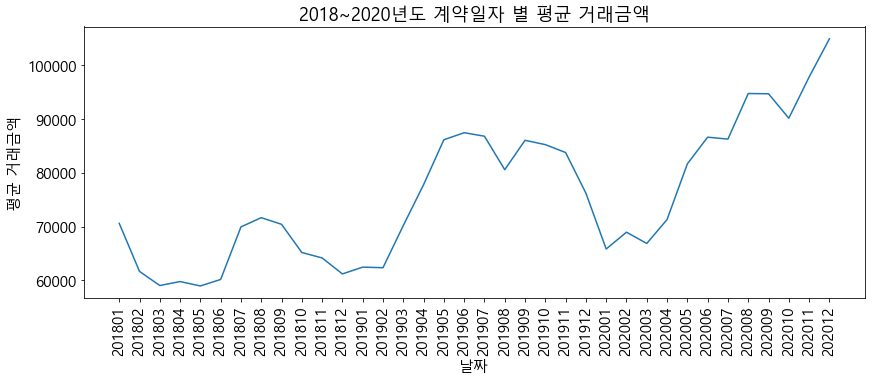

In [63]:
# 계약년월 별로 그룹화 후 평균 거래금액 산출 
train_data['계약년월'] = train_data['계약년월'].astype('str')
train_data_grouped_ymd_mean = train_data.groupby(train_data['계약년월'])['거래금액'].mean()

# 시각화
plt.rc('font', size=15)
fig=plt.figure(figsize=(14, 5))
# plt.boxplot(train_data['계약년월'], train_data['거래금액'])
plt.plot(train_data_grouped_ymd_mean)
plt.xticks(rotation='vertical')
plt.title('2018~2020년도 계약일자 별 평균 거래금액')
plt.xlabel('날짜')
plt.ylabel('평균 거래금액')
plt.show()

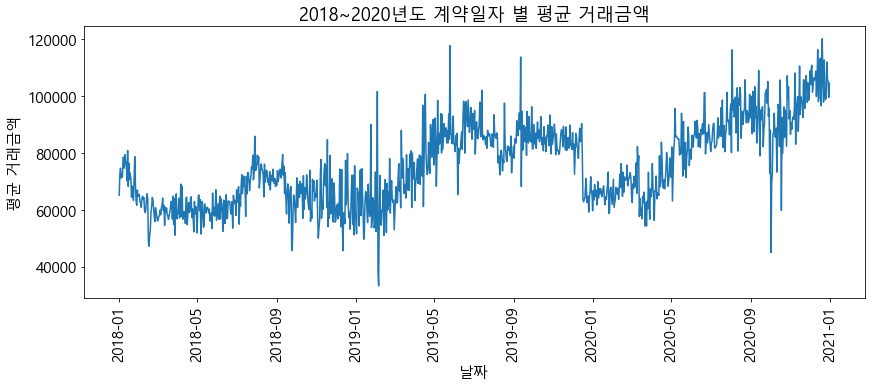

In [64]:
# 계약년월 별로 그룹화 후 평균 거래금액 산출 
train_data_grouped_ymd_mean = train_data.groupby(train_data['계약날짜'])['거래금액'].mean()

# 시각화
plt.rc('font', size=15)
fig=plt.figure(figsize=(14, 5))
# plt.boxplot(train_data['계약년월'], train_data['거래금액'])
plt.plot(train_data_grouped_ymd_mean)
plt.xticks(rotation='vertical')
plt.title('2018~2020년도 계약일자 별 평균 거래금액')
plt.xlabel('날짜')
plt.ylabel('평균 거래금액')
plt.show()

In [65]:
le = LabelEncoder()
train_data['계약날짜인코딩'] = le.fit_transform(train_data['계약날짜'])
train_data[['계약날짜', '계약날짜인코딩']].sort_values('계약날짜')

,계약날짜,계약날짜인코딩
79138,2018-01-01,0
592,2018-01-01,0
52288,2018-01-01,0
14297,2018-01-01,0
19703,2018-01-01,0
...,...,...
73217,2020-12-31,1095
73795,2020-12-31,1095
82653,2020-12-31,1095
75893,2020-12-31,1095


In [66]:
train_data

,시군구,단지명,전용면적,계약년월,계약일,거래금액,층,건축년도,제곱미터단가,평당단가,시,구,동,단지명브랜드,계약날짜,계약날짜인코딩
0,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,03,130000,4,1987,1625.609604,5364.511692,서울특별시,강남구,개포동,기타,2018-01-03,2
1,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,08,117000,2,1987,1463.048643,4828.060523,서울특별시,강남구,개포동,기타,2018-01-08,7
2,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,11,130000,1,1987,1625.609604,5364.511692,서울특별시,강남구,개포동,기타,2018-01-11,10
3,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201803,19,139500,2,1987,1744.404152,5756.533700,서울특별시,강남구,개포동,기타,2018-03-19,77
4,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,54.98,201804,05,107500,5,1987,1955.256457,6452.346308,서울특별시,강남구,개포동,기타,2018-04-05,94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84233,서울특별시 중랑구 중화동,한영(104),106.21,202003,11,45400,6,2003,427.455042,1410.601638,서울특별시,중랑구,중화동,기타,2020-03-11,800
84234,서울특별시 중랑구 중화동,한영(104),67.57,202008,07,26000,2,2003,384.786148,1269.794287,서울특별시,중랑구,중화동,기타,2020-08-07,949
84235,서울특별시 중랑구 중화동,현대휴앤미,95.94,202007,10,44000,6,2007,458.619971,1513.445904,서울특별시,중랑구,중화동,현대,2020-07-10,921
84236,서울특별시 중랑구 중화동,현대휴앤미,100.17,202012,03,54800,5,2007,547.069981,1805.330937,서울특별시,중랑구,중화동,현대,2020-12-03,1067


In [67]:
# 계약년월까지 저장
train_data.to_csv('train_data.csv', encoding='utf-8-sig', index=False)
print('train_data.csv , 계약년월까지 csv로 저장되었습니다.')

train_data.csv , 계약년월까지 csv로 저장되었습니다.


### 전용면적

In [68]:
# train_data.rename(columns = {'전용면적(㎡)':'전용면적'}, inplace=True)
# train_data

(300.0, 400.0)

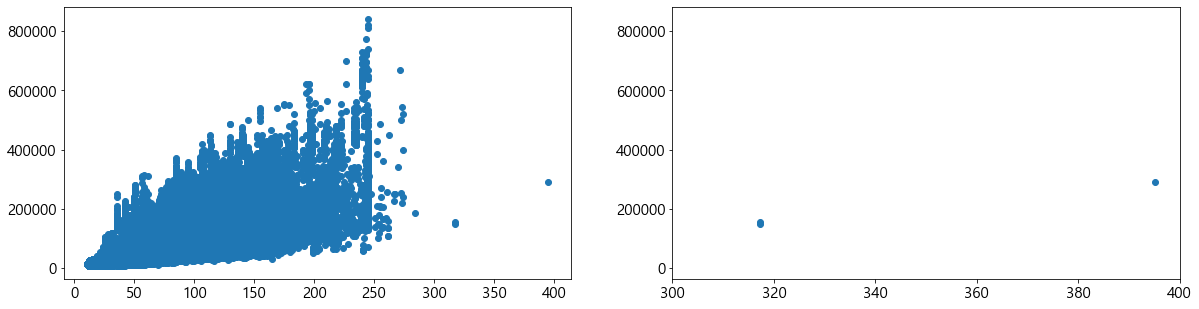

In [69]:
#거래금액 - 전용면적 분포도 확인 (12/26)
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
plt.scatter(train_data['전용면적'],train_data['거래금액'])

plt.subplot(1, 2, 2)
plt.scatter(train_data['전용면적'],train_data['거래금액'])
plt.xlim([300,400])#max=395.06

In [70]:
# 이상치 제거하기
train_data.drop(train_data.loc[train_data['전용면적']>300].index, inplace=True)
train_data

,시군구,단지명,전용면적,계약년월,계약일,거래금액,층,건축년도,제곱미터단가,평당단가,시,구,동,단지명브랜드,계약날짜,계약날짜인코딩
0,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,03,130000,4,1987,1625.609604,5364.511692,서울특별시,강남구,개포동,기타,2018-01-03,2
1,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,08,117000,2,1987,1463.048643,4828.060523,서울특별시,강남구,개포동,기타,2018-01-08,7
2,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,11,130000,1,1987,1625.609604,5364.511692,서울특별시,강남구,개포동,기타,2018-01-11,10
3,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201803,19,139500,2,1987,1744.404152,5756.533700,서울특별시,강남구,개포동,기타,2018-03-19,77
4,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,54.98,201804,05,107500,5,1987,1955.256457,6452.346308,서울특별시,강남구,개포동,기타,2018-04-05,94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84233,서울특별시 중랑구 중화동,한영(104),106.21,202003,11,45400,6,2003,427.455042,1410.601638,서울특별시,중랑구,중화동,기타,2020-03-11,800
84234,서울특별시 중랑구 중화동,한영(104),67.57,202008,07,26000,2,2003,384.786148,1269.794287,서울특별시,중랑구,중화동,기타,2020-08-07,949
84235,서울특별시 중랑구 중화동,현대휴앤미,95.94,202007,10,44000,6,2007,458.619971,1513.445904,서울특별시,중랑구,중화동,현대,2020-07-10,921
84236,서울특별시 중랑구 중화동,현대휴앤미,100.17,202012,03,54800,5,2007,547.069981,1805.330937,서울특별시,중랑구,중화동,현대,2020-12-03,1067


In [71]:
train_data['전용면적'].describe()

count    237987.000000
mean         78.106752
std          30.249997
min          10.321500
25%          59.730000
50%          83.580000
75%          84.970000
max         283.760000
Name: 전용면적, dtype: float64

In [72]:
# #로그변환
# train_data['전용면적_log']=np.log1p(train_data['전용면적'])
# train_data

In [73]:
# #10단위로 29구간 인코딩 (10~290)
# labels=list(range(1,30))
# train_data['전용면적_10']=pd.cut(train_data['전용면적'],
#                                 bins=29, labels=labels, include_lowest=True)
# train_data

In [74]:
# train_data['전용면적_10'].value_counts()

In [75]:
# train_data['전용면적'].value_counts().sort_values(ascending=False)

In [76]:
# 전용면적까지 저장
train_data.to_csv('train_data.csv', encoding='utf-8-sig', index=False)
print('train_data.csv , 전용면적까지 csv로 저장되었습니다.')

train_data.csv , 전용면적까지 csv로 저장되었습니다.


### 건축년도

In [77]:
# 분포

In [78]:
# 거래금액, 제곱미터당 단가, 시군구, 단지명브랜드, 계약날짜 인코딩, 층, 전용면적, 층까지 저장
train_data.to_csv('train_data_ver1.csv', encoding='utf-8-sig', index=False)
print('train_data_ver1.csv , 기존 부동산 데이터가 csv로 저장되었습니다.')

train_data_ver1.csv , 기존 부동산 데이터가 csv로 저장되었습니다.


## -- 추가 데이터 --

### 공원 데이터

In [79]:
# 공원 데이터
park_data=pd.read_csv('park.csv')
park_data=park_data.loc[park_data['city']=='서울특별시'].reset_index()

#공원 이전까지 인코딩된 데이터 불러오기
train_data=pd.read_csv('train_data_ver1.csv')

train_data

,시군구,단지명,전용면적,계약년월,계약일,거래금액,층,건축년도,제곱미터단가,평당단가,시,구,동,단지명브랜드,계약날짜,계약날짜인코딩
0,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,3,130000,4,1987,1625.609604,5364.511692,서울특별시,강남구,개포동,기타,2018-01-03,2
1,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,8,117000,2,1987,1463.048643,4828.060523,서울특별시,강남구,개포동,기타,2018-01-08,7
2,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,11,130000,1,1987,1625.609604,5364.511692,서울특별시,강남구,개포동,기타,2018-01-11,10
3,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201803,19,139500,2,1987,1744.404152,5756.533700,서울특별시,강남구,개포동,기타,2018-03-19,77
4,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,54.98,201804,5,107500,5,1987,1955.256457,6452.346308,서울특별시,강남구,개포동,기타,2018-04-05,94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237982,서울특별시 중랑구 중화동,한영(104),106.21,202003,11,45400,6,2003,427.455042,1410.601638,서울특별시,중랑구,중화동,기타,2020-03-11,800
237983,서울특별시 중랑구 중화동,한영(104),67.57,202008,7,26000,2,2003,384.786148,1269.794287,서울특별시,중랑구,중화동,기타,2020-08-07,949
237984,서울특별시 중랑구 중화동,현대휴앤미,95.94,202007,10,44000,6,2007,458.619971,1513.445904,서울특별시,중랑구,중화동,현대,2020-07-10,921
237985,서울특별시 중랑구 중화동,현대휴앤미,100.17,202012,3,54800,5,2007,547.069981,1805.330937,서울특별시,중랑구,중화동,현대,2020-12-03,1067


In [80]:
park_data['gu'].value_counts()

송파구     147
강남구     132
강서구     109
서초구     107
은평구      79
서대문구     50
구로구      47
동작구      46
동대문구     41
용산구      32
성동구      23
강동구      23
관악구      21
중구       14
광진구      11
중랑구      11
금천구      10
강북구       9
영등포구      8
종로구       5
도봉구       2
노원구       2
양천구       1
Name: gu, dtype: int64

In [81]:
park_data

,index,city,gu,dong,park_name,park_type,park_area,park_exercise_facility,park_entertainment_facility,park_benefit_facility,park_cultural_facitiy,park_facility_other,park_open_year,reference_date
0,58,서울특별시,서초구,반포동,반 포,근린공원,26092.2,NaN,NaN,NaN,NaN,NaN,1981.0,2018-06-30
1,59,서울특별시,서초구,양재동,방아다리1,근린공원,2870.8,NaN,NaN,NaN,NaN,NaN,1988.0,2018-06-30
2,60,서울특별시,서초구,양재동,방아다리2,근린공원,2934.3,NaN,NaN,NaN,NaN,NaN,1988.0,2018-06-30
3,61,서울특별시,서초구,양재동,양재천,근린공원,19258.0,NaN,NaN,NaN,NaN,NaN,1988.0,2018-06-30
4,62,서울특별시,서초구,양재동,마 방,근린공원,6546.6,NaN,NaN,NaN,NaN,NaN,1983.0,2018-06-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
925,1354,서울특별시,구로구,천왕동,이펜시아어린이공원,어린이공원,1500.0,NaN,조합놀이 1기,NaN,NaN,NaN,2006.0,2019-02-25
926,1355,서울특별시,구로구,천왕동,개명소공원,소공원,5415.0,NaN,NaN,NaN,NaN,NaN,2006.0,2019-02-25
927,1356,서울특별시,구로구,천왕동,봉화대근린공원,근린공원,60975.0,NaN,NaN,NaN,NaN,NaN,2006.0,2019-02-25
928,1357,서울특별시,구로구,항동,푸른수목원,근린공원,100809.0,NaN,NaN,NaN,NaN,NaN,2005.0,2019-02-25


In [82]:
# 필요한 컬럼만 가져오기
park_data.drop(park_data.iloc[:, 5:14], axis=1, inplace=True)
park_data.drop(columns=['index'], inplace=True)
park_data

,city,gu,dong,park_name
0,서울특별시,서초구,반포동,반 포
1,서울특별시,서초구,양재동,방아다리1
2,서울특별시,서초구,양재동,방아다리2
3,서울특별시,서초구,양재동,양재천
4,서울특별시,서초구,양재동,마 방
...,...,...,...,...
925,서울특별시,구로구,천왕동,이펜시아어린이공원
926,서울특별시,구로구,천왕동,개명소공원
927,서울특별시,구로구,천왕동,봉화대근린공원
928,서울특별시,구로구,항동,푸른수목원


In [83]:
# 중복값 확인 및 삭제 
park_data=park_data.drop_duplicates()
park_data

,city,gu,dong,park_name
0,서울특별시,서초구,반포동,반 포
1,서울특별시,서초구,양재동,방아다리1
2,서울특별시,서초구,양재동,방아다리2
3,서울특별시,서초구,양재동,양재천
4,서울특별시,서초구,양재동,마 방
...,...,...,...,...
925,서울특별시,구로구,천왕동,이펜시아어린이공원
926,서울특별시,구로구,천왕동,개명소공원
927,서울특별시,구로구,천왕동,봉화대근린공원
928,서울특별시,구로구,항동,푸른수목원


In [84]:
# 구, 동별 공원 갯수 mapping
# 결측치는 0으로 일괄 처리
dong_park=park_data['gu'].value_counts()
train_data['구별 공원 갯수']=train_data['구'].map(dong_park).fillna(0)
train_data

,시군구,단지명,전용면적,계약년월,계약일,거래금액,층,건축년도,제곱미터단가,평당단가,시,구,동,단지명브랜드,계약날짜,계약날짜인코딩,구별 공원 갯수
0,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,3,130000,4,1987,1625.609604,5364.511692,서울특별시,강남구,개포동,기타,2018-01-03,2,132.0
1,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,8,117000,2,1987,1463.048643,4828.060523,서울특별시,강남구,개포동,기타,2018-01-08,7,132.0
2,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,11,130000,1,1987,1625.609604,5364.511692,서울특별시,강남구,개포동,기타,2018-01-11,10,132.0
3,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201803,19,139500,2,1987,1744.404152,5756.533700,서울특별시,강남구,개포동,기타,2018-03-19,77,132.0
4,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,54.98,201804,5,107500,5,1987,1955.256457,6452.346308,서울특별시,강남구,개포동,기타,2018-04-05,94,132.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237982,서울특별시 중랑구 중화동,한영(104),106.21,202003,11,45400,6,2003,427.455042,1410.601638,서울특별시,중랑구,중화동,기타,2020-03-11,800,11.0
237983,서울특별시 중랑구 중화동,한영(104),67.57,202008,7,26000,2,2003,384.786148,1269.794287,서울특별시,중랑구,중화동,기타,2020-08-07,949,11.0
237984,서울특별시 중랑구 중화동,현대휴앤미,95.94,202007,10,44000,6,2007,458.619971,1513.445904,서울특별시,중랑구,중화동,현대,2020-07-10,921,11.0
237985,서울특별시 중랑구 중화동,현대휴앤미,100.17,202012,3,54800,5,2007,547.069981,1805.330937,서울특별시,중랑구,중화동,현대,2020-12-03,1067,11.0


In [85]:
train_data[['구','구별 공원 갯수']].value_counts()[:30]

구     구별 공원 갯수
노원구   2.0         24717
송파구   144.0       14923
강서구   107.0       14658
성북구   0.0         12987
구로구   47.0        12970
강동구   23.0        12050
강남구   132.0       11842
도봉구   2.0         11355
양천구   1.0         11156
영등포구  8.0          9765
서초구   105.0        9532
은평구   79.0         9045
성동구   23.0         9012
동대문구  41.0         8885
마포구   0.0          8600
동작구   46.0         8257
서대문구  50.0         7999
중랑구   11.0         7940
관악구   21.0         7803
강북구   9.0          5485
용산구   32.0         4677
금천구   10.0         4551
광진구   11.0         4423
중구    14.0         3266
종로구   5.0          2089
dtype: int64

In [86]:
# 중간 저장
train_data.to_csv('train_data.csv', encoding='utf-8-sig', index=False)
print('train_data.csv , 공원까지 csv로 저장되었습니다.')

train_data.csv , 공원까지 csv로 저장되었습니다.


### 8학군

In [87]:
# 강남 8학군 기준 - 반포, 서초, 압구정, 개포, 방배, 대치
dong_8=['반포', '서초', '압구정', '개포', '방배', '대치']
train_data['8학군']=0
for dong in dong_8:
    train_data.loc[train_data['동'].str.contains(dong), '8학군'] = 1
train_data['8학군'].value_counts()

0    227226
1     10761
Name: 8학군, dtype: int64

In [88]:
train_data

,시군구,단지명,전용면적,계약년월,계약일,거래금액,층,건축년도,제곱미터단가,평당단가,시,구,동,단지명브랜드,계약날짜,계약날짜인코딩,구별 공원 갯수,8학군
0,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,3,130000,4,1987,1625.609604,5364.511692,서울특별시,강남구,개포동,기타,2018-01-03,2,132.0,1
1,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,8,117000,2,1987,1463.048643,4828.060523,서울특별시,강남구,개포동,기타,2018-01-08,7,132.0,1
2,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,11,130000,1,1987,1625.609604,5364.511692,서울특별시,강남구,개포동,기타,2018-01-11,10,132.0,1
3,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201803,19,139500,2,1987,1744.404152,5756.533700,서울특별시,강남구,개포동,기타,2018-03-19,77,132.0,1
4,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,54.98,201804,5,107500,5,1987,1955.256457,6452.346308,서울특별시,강남구,개포동,기타,2018-04-05,94,132.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237982,서울특별시 중랑구 중화동,한영(104),106.21,202003,11,45400,6,2003,427.455042,1410.601638,서울특별시,중랑구,중화동,기타,2020-03-11,800,11.0,0
237983,서울특별시 중랑구 중화동,한영(104),67.57,202008,7,26000,2,2003,384.786148,1269.794287,서울특별시,중랑구,중화동,기타,2020-08-07,949,11.0,0
237984,서울특별시 중랑구 중화동,현대휴앤미,95.94,202007,10,44000,6,2007,458.619971,1513.445904,서울특별시,중랑구,중화동,현대,2020-07-10,921,11.0,0
237985,서울특별시 중랑구 중화동,현대휴앤미,100.17,202012,3,54800,5,2007,547.069981,1805.330937,서울특별시,중랑구,중화동,현대,2020-12-03,1067,11.0,0


In [89]:
# 중간 저장
train_data.to_csv('train_data.csv', encoding='utf-8-sig', index=False)
print('train_data.csv , 8학군까지 csv로 저장되었습니다.')

train_data.csv , 8학군까지 csv로 저장되었습니다.


### 학원 데이터

In [90]:
cram_school_data

,학원명,학원주소
0,예맥보습학원,서울특별시 중랑구 동일로151길 30 2층3층 (묵동)
1,세진보습학원,서울특별시 중랑구 공릉로 58 2층4층일부 (묵동)
2,대찬하브루타학원,"서울특별시 동대문구 전농로 120 , 3층 (전농동)"
3,장안로드맵수학학원,"서울특별시 동대문구 한천로 124 , 2층 202호 (장안동)"
4,더하이스트수학학원,"서울특별시 동대문구 사가정로 190 전농우성아파트 상가4층7,8,9호 (전농동)"
...,...,...
8384,EIE(이아이이)어학원,"서울특별시 강북구 도봉로 189 , 4층,5층 (미아동)"
8385,이상숙어학원,"서울특별시 성북구 오패산로 98 , 402호,501호,502호,503호 (하월곡동,..."
8386,성북메가스터디학원,서울특별시 성북구 아리랑로 17 민국빌딩 1-5층 (동소문동6가)
8387,하이스트미래탐구학원,서울특별시 성북구 정릉로 364 3-5층 (돈암동)


In [91]:
cram_school_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8389 entries, 0 to 8388
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   학원명     8389 non-null   object
 1   학원주소    8389 non-null   object
dtypes: object(2)
memory usage: 131.2+ KB


In [92]:
region_split = cram_school_data['학원주소'].map(lambda x : x[x.find(' ')+1:x.find(' ',6)+1].replace(' ','') if x.find('구')!=-1 else None)
cram_school_data['구']=region_split
cram_school_data

,학원명,학원주소,구
0,예맥보습학원,서울특별시 중랑구 동일로151길 30 2층3층 (묵동),중랑구
1,세진보습학원,서울특별시 중랑구 공릉로 58 2층4층일부 (묵동),중랑구
2,대찬하브루타학원,"서울특별시 동대문구 전농로 120 , 3층 (전농동)",동대문구
3,장안로드맵수학학원,"서울특별시 동대문구 한천로 124 , 2층 202호 (장안동)",동대문구
4,더하이스트수학학원,"서울특별시 동대문구 사가정로 190 전농우성아파트 상가4층7,8,9호 (전농동)",동대문구
...,...,...,...
8384,EIE(이아이이)어학원,"서울특별시 강북구 도봉로 189 , 4층,5층 (미아동)",강북구
8385,이상숙어학원,"서울특별시 성북구 오패산로 98 , 402호,501호,502호,503호 (하월곡동,...",성북구
8386,성북메가스터디학원,서울특별시 성북구 아리랑로 17 민국빌딩 1-5층 (동소문동6가),성북구
8387,하이스트미래탐구학원,서울특별시 성북구 정릉로 364 3-5층 (돈암동),성북구


In [93]:
sum(region_split[region_split.isna()]) #모두 잘 들어감

0

In [94]:
cram_school_count=cram_school_data['구'].value_counts()
cram_school_count

강남구     1304
양천구      743
송파구      655
서초구      613
노원구      506
강서구      455
강동구      453
은평구      366
성북구      301
마포구      290
동작구      257
관악구      253
광진구      250
구로구      249
영등포구     222
동대문구     220
서대문구     217
도봉구      216
중랑구      174
성동구      168
강북구      150
금천구      121
종로구       86
용산구       74
중구        46
Name: 구, dtype: int64

In [95]:
train_data['구별 교과학원 갯수']=train_data['구'].map(cram_school_count)
train_data

,시군구,단지명,전용면적,계약년월,계약일,거래금액,층,건축년도,제곱미터단가,평당단가,시,구,동,단지명브랜드,계약날짜,계약날짜인코딩,구별 공원 갯수,8학군,구별 교과학원 갯수
0,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,3,130000,4,1987,1625.609604,5364.511692,서울특별시,강남구,개포동,기타,2018-01-03,2,132.0,1,1304
1,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,8,117000,2,1987,1463.048643,4828.060523,서울특별시,강남구,개포동,기타,2018-01-08,7,132.0,1,1304
2,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,11,130000,1,1987,1625.609604,5364.511692,서울특별시,강남구,개포동,기타,2018-01-11,10,132.0,1,1304
3,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201803,19,139500,2,1987,1744.404152,5756.533700,서울특별시,강남구,개포동,기타,2018-03-19,77,132.0,1,1304
4,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,54.98,201804,5,107500,5,1987,1955.256457,6452.346308,서울특별시,강남구,개포동,기타,2018-04-05,94,132.0,1,1304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237982,서울특별시 중랑구 중화동,한영(104),106.21,202003,11,45400,6,2003,427.455042,1410.601638,서울특별시,중랑구,중화동,기타,2020-03-11,800,11.0,0,174
237983,서울특별시 중랑구 중화동,한영(104),67.57,202008,7,26000,2,2003,384.786148,1269.794287,서울특별시,중랑구,중화동,기타,2020-08-07,949,11.0,0,174
237984,서울특별시 중랑구 중화동,현대휴앤미,95.94,202007,10,44000,6,2007,458.619971,1513.445904,서울특별시,중랑구,중화동,현대,2020-07-10,921,11.0,0,174
237985,서울특별시 중랑구 중화동,현대휴앤미,100.17,202012,3,54800,5,2007,547.069981,1805.330937,서울특별시,중랑구,중화동,현대,2020-12-03,1067,11.0,0,174


In [96]:
# 동별-지하철역 / 구별-공원,학원,8학군
train_data.to_csv('train_data_ver2.csv', encoding='utf-8-sig')
print('train_data_ver2.csv(지하철, 공원, 학원, 8학군)이 저장되었습니다.')

train_data_ver2.csv(지하철, 공원, 학원, 8학군)이 저장되었습니다.


In [97]:
# 중간 저장
train_data.to_csv('train_data.csv', encoding='utf-8-sig', index=False)
print('train_data.csv , 학원까지 csv로 저장되었습니다.')

train_data.csv , 학원까지 csv로 저장되었습니다.


### 유통업체

In [98]:
retail_df = pd.read_csv('유통업체.csv', encoding='cp949')
retail_df.head()

,자치구,동,대형마트 수,백화점 수
0,종로구,종로1.2.3.4가동,0,0
1,종로구,종로5·6가동,0,0
2,종로구,창신1동,0,0
3,종로구,창신3동,0,0
4,종로구,숭인2동,0,0


### 구별 집계

In [99]:
group_by_gu = retail_df.groupby('자치구').sum()
group_by_gu = group_by_gu.reset_index()
group_by_gu['전체 마트 수'] = group_by_gu['대형마트 수'] + group_by_gu['백화점 수']
group_by_gu = group_by_gu[group_by_gu['전체 마트 수'] != 0]
group_by_gu = group_by_gu.reset_index().drop('index', axis=1)
group_by_gu

,자치구,대형마트 수,백화점 수,전체 마트 수
0,강남구,1,6,7
1,강동구,3,1,4
2,강북구,1,1,2
3,강서구,3,1,4
4,관악구,1,1,2
5,광진구,2,1,3
6,구로구,3,2,5
7,금천구,3,0,3
8,노원구,2,2,4
9,도봉구,2,0,2


In [100]:
# 구별 대형마트 수 원본 데이터에 매핑
big_mart_count_by_gu = group_by_gu[['자치구', '대형마트 수']]
big_mart_guname = list(big_mart_count_by_gu['자치구'])
big_mart_guvalue = list(big_mart_count_by_gu['대형마트 수'])
big_mart_count_by_gu = pd.Series(index=big_mart_guname, data=big_mart_guvalue)

train_data['구별 대형마트 수'] = train_data['구'].map(big_mart_count_by_gu)
train_data['구별 대형마트 수'].value_counts()

2.0    75380
3.0    65816
1.0    36286
4.0    24455
0.0    16256
5.0     9765
6.0     7940
Name: 구별 대형마트 수, dtype: int64

In [101]:
# 구별 백화점 수 원본 데이터에 매핑
department_count_by_gu = group_by_gu[['자치구', '백화점 수']]
department_guname = list(department_count_by_gu['자치구'])
department_guvalue = list(department_count_by_gu['백화점 수'])
department_count_by_gu = pd.Series(index=department_guname, data=department_guvalue)

train_data['구별 백화점 수'] = train_data['구'].map(department_count_by_gu)
train_data['구별 백화점 수'].value_counts()

1.0    98380
2.0    62142
0.0    50503
3.0    13031
6.0    11842
Name: 구별 백화점 수, dtype: int64

In [102]:
train_data

,시군구,단지명,전용면적,계약년월,계약일,거래금액,층,건축년도,제곱미터단가,평당단가,시,구,동,단지명브랜드,계약날짜,계약날짜인코딩,구별 공원 갯수,8학군,구별 교과학원 갯수,구별 대형마트 수,구별 백화점 수
0,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,3,130000,4,1987,1625.609604,5364.511692,서울특별시,강남구,개포동,기타,2018-01-03,2,132.0,1,1304,1.0,6.0
1,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,8,117000,2,1987,1463.048643,4828.060523,서울특별시,강남구,개포동,기타,2018-01-08,7,132.0,1,1304,1.0,6.0
2,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,11,130000,1,1987,1625.609604,5364.511692,서울특별시,강남구,개포동,기타,2018-01-11,10,132.0,1,1304,1.0,6.0
3,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201803,19,139500,2,1987,1744.404152,5756.533700,서울특별시,강남구,개포동,기타,2018-03-19,77,132.0,1,1304,1.0,6.0
4,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,54.98,201804,5,107500,5,1987,1955.256457,6452.346308,서울특별시,강남구,개포동,기타,2018-04-05,94,132.0,1,1304,1.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237982,서울특별시 중랑구 중화동,한영(104),106.21,202003,11,45400,6,2003,427.455042,1410.601638,서울특별시,중랑구,중화동,기타,2020-03-11,800,11.0,0,174,6.0,0.0
237983,서울특별시 중랑구 중화동,한영(104),67.57,202008,7,26000,2,2003,384.786148,1269.794287,서울특별시,중랑구,중화동,기타,2020-08-07,949,11.0,0,174,6.0,0.0
237984,서울특별시 중랑구 중화동,현대휴앤미,95.94,202007,10,44000,6,2007,458.619971,1513.445904,서울특별시,중랑구,중화동,현대,2020-07-10,921,11.0,0,174,6.0,0.0
237985,서울특별시 중랑구 중화동,현대휴앤미,100.17,202012,3,54800,5,2007,547.069981,1805.330937,서울특별시,중랑구,중화동,현대,2020-12-03,1067,11.0,0,174,6.0,0.0


In [103]:
# 구별 전체 마트 수 원본 데이터에 매핑
all_count_by_gu = group_by_gu[['자치구', '전체 마트 수']]
all_guname = list(all_count_by_gu['자치구'])
all_guvalue = list(all_count_by_gu['전체 마트 수'])
all_count_by_gu = pd.Series(index=all_guname, data=all_guvalue)

train_data['구별 전체 마트 수'] = train_data['구'].map(all_count_by_gu).fillna(0)
train_data['구별 전체 마트 수'].value_counts()

4.0    64412
2.0    53856
6.0    32395
3.0    31136
1.0    16256
5.0    16236
7.0    11842
8.0     9765
0.0     2089
Name: 구별 전체 마트 수, dtype: int64

In [104]:
# 중간 저장
train_data.to_csv('train_data.csv', encoding='utf-8-sig', index=False)
print('train_data.csv , 유통업체까지 csv로 저장되었습니다.')

train_data.csv , 유통업체까지 csv로 저장되었습니다.


### 병원

In [105]:
# 병원 데이터 불러오기
hospital_data = pd.read_csv('병원.csv')
hospital_data.drop('동', axis=1, inplace=True)
hospital_data

,자치구,대학병원 병원수,대학병원 병상수,종합 병원수,종합 병상수
0,종로구,0,0,0,0
1,종로구,0,0,1,30
2,종로구,0,0,0,0
3,종로구,0,0,1,123
4,종로구,1,218,0,0
...,...,...,...,...,...
419,강동구,0,0,0,0
420,강동구,1,965,0,0
421,강동구,0,0,0,0
422,강동구,0,0,1,32


In [106]:
# 구별 종합병원수, 종합병상수 count
group_by_gu = hospital_data.groupby('자치구').sum()
group_by_gu = group_by_gu.reset_index()
group_by_gu.drop(['대학병원 병상수','종합 병상수'], axis=1, inplace=True)
group_by_gu

,자치구,대학병원 병원수,종합 병원수
0,강남구,4,33
1,강동구,3,14
2,강북구,1,8
3,강서구,3,16
4,관악구,2,8
5,광진구,2,3
6,구로구,2,8
7,금천구,1,6
8,노원구,3,7
9,도봉구,1,5


In [107]:
group_by_gu=group_by_gu.set_index('자치구', drop=True)
group_by_gu

,대학병원 병원수,종합 병원수
자치구,,
강남구,4,33
강동구,3,14
강북구,1,8
강서구,3,16
관악구,2,8
광진구,2,3
구로구,2,8
금천구,1,6
노원구,3,7


In [108]:
train_data['구별 대학병원 병원수']=train_data['구'].map(group_by_gu['대학병원 병원수'])
train_data['구별 종합병원 병원수']=train_data['구'].map(group_by_gu['종합 병원수'])
train_data

,시군구,단지명,전용면적,계약년월,계약일,거래금액,층,건축년도,제곱미터단가,평당단가,시,구,동,단지명브랜드,계약날짜,계약날짜인코딩,구별 공원 갯수,8학군,구별 교과학원 갯수,구별 대형마트 수,구별 백화점 수,구별 전체 마트 수,구별 대학병원 병원수,구별 종합병원 병원수
0,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,3,130000,4,1987,1625.609604,5364.511692,서울특별시,강남구,개포동,기타,2018-01-03,2,132.0,1,1304,1.0,6.0,7.0,4,33
1,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,8,117000,2,1987,1463.048643,4828.060523,서울특별시,강남구,개포동,기타,2018-01-08,7,132.0,1,1304,1.0,6.0,7.0,4,33
2,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,11,130000,1,1987,1625.609604,5364.511692,서울특별시,강남구,개포동,기타,2018-01-11,10,132.0,1,1304,1.0,6.0,7.0,4,33
3,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201803,19,139500,2,1987,1744.404152,5756.533700,서울특별시,강남구,개포동,기타,2018-03-19,77,132.0,1,1304,1.0,6.0,7.0,4,33
4,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,54.98,201804,5,107500,5,1987,1955.256457,6452.346308,서울특별시,강남구,개포동,기타,2018-04-05,94,132.0,1,1304,1.0,6.0,7.0,4,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237982,서울특별시 중랑구 중화동,한영(104),106.21,202003,11,45400,6,2003,427.455042,1410.601638,서울특별시,중랑구,중화동,기타,2020-03-11,800,11.0,0,174,6.0,0.0,6.0,3,12
237983,서울특별시 중랑구 중화동,한영(104),67.57,202008,7,26000,2,2003,384.786148,1269.794287,서울특별시,중랑구,중화동,기타,2020-08-07,949,11.0,0,174,6.0,0.0,6.0,3,12
237984,서울특별시 중랑구 중화동,현대휴앤미,95.94,202007,10,44000,6,2007,458.619971,1513.445904,서울특별시,중랑구,중화동,현대,2020-07-10,921,11.0,0,174,6.0,0.0,6.0,3,12
237985,서울특별시 중랑구 중화동,현대휴앤미,100.17,202012,3,54800,5,2007,547.069981,1805.330937,서울특별시,중랑구,중화동,현대,2020-12-03,1067,11.0,0,174,6.0,0.0,6.0,3,12


In [109]:
# 중간 저장
train_data.to_csv('train_data.csv', encoding='utf-8-sig', index=False)
print('train_data.csv , 병원까지 csv로 저장되었습니다.')

train_data.csv , 병원까지 csv로 저장되었습니다.


### 파생변수

In [110]:
# 단지명브랜드별 거래 횟수 대비 신축 거래 횟수
# train_original_data / train_data
danji_count=train_data['단지명브랜드'].value_counts()
sinchook=train_data.loc[train_data['건축년도']>2010] #신축
goochook=train_data.loc[train_data['건축년도']<=2010] #구축

sinchook_count=sinchook['단지명브랜드'].value_counts()
singoo=pd.concat([sinchook_count,danji_count], axis=1, keys=['sinchook_count','danji_count']).fillna(0)
singoo

,sinchook_count,danji_count
기타,16458.0,148730
래미안,5063.0,13872
힐스테이트,2967.0,5388
자이,2370.0,4166
푸르지오,1771.0,5734
이편한|e편한|e-편한,1387.0,4435
롯데캐슬,1135.0,3891
아이파크,1126.0,3086
두산|두산위브,649.0,5107
센트레빌,598.0,2133


In [111]:
# 단지 거래 횟수별 신축 비율
singoo['singoo_ratio']=singoo['sinchook_count']/singoo['danji_count']
singoo['singoo_ratio']
# singoo.loc[singoo['singoo_ratio']!=1]

기타              0.110657
래미안             0.364980
힐스테이트           0.550668
자이              0.568891
푸르지오            0.308859
이편한|e편한|e-편한    0.312740
롯데캐슬            0.291699
아이파크            0.364874
두산|두산위브         0.127080
센트레빌            0.280356
포스코|더샵          0.375986
데시앙             0.389714
sk|SK|에스케이      0.132709
현대              0.016495
하늘채             0.673469
리슈빌             1.000000
서희|서희스타힐스       0.977273
삼성              0.021814
스위첸             0.829060
호반              1.000000
한라|한라비발디        0.300000
GS              0.358209
KCC             0.317568
한화              0.037952
대우              0.014023
쌍용              0.014109
플래티넘            0.193548
우미              0.200000
벽산              0.000768
코오롱             0.000000
롯데              0.000000
벽산블루밍           0.000000
태영              0.000000
동부              0.000000
코아루             0.000000
계룡              0.000000
동문              0.000000
Name: singoo_ratio, dtype: float64

In [112]:
# 인코딩 데이터 train_data에 합치기
train_data['단지명별 신축거래비율']=train_data['단지명브랜드'].map(singoo['singoo_ratio'])
train_data[['단지명브랜드','단지명별 신축거래비율']].value_counts()

단지명브랜드        단지명별 신축거래비율
기타            0.110657       148730
현대            0.016495        17702
래미안           0.364980        13872
푸르지오          0.308859         5734
힐스테이트         0.550668         5388
두산|두산위브       0.127080         5107
삼성            0.021814         4630
이편한|e편한|e-편한  0.312740         4435
자이            0.568891         4166
벽산            0.000768         3905
롯데캐슬          0.291699         3891
아이파크          0.364874         3086
sk|SK|에스케이    0.132709         2351
대우            0.014023         2282
쌍용            0.014109         2268
센트레빌          0.280356         2133
포스코|더샵        0.375986         1141
한화            0.037952         1133
데시앙           0.389714          875
코오롱           0.000000          822
롯데            0.000000          728
벽산블루밍         0.000000          687
태영            0.000000          633
동부            0.000000          546
하늘채           0.673469          343
한라|한라비발디      0.300000          180
서희|서희스타힐스     0.977273          176
리슈

In [113]:
# 중간 저장
train_data.to_csv('train_data.csv', encoding='utf-8-sig', index=False)
print('train_data_pre_drop.csv , 파생변수까지 csv로 저장되었습니다.')

train_data_pre_drop.csv , 파생변수까지 csv로 저장되었습니다.


### 전처리 완료 데이터 csv 저장

In [114]:
train_data.columns

Index(['시군구', '단지명', '전용면적', '계약년월', '계약일', '거래금액', '층', '건축년도', '제곱미터단가',
       '평당단가', '시', '구', '동', '단지명브랜드', '계약날짜', '계약날짜인코딩', '구별 공원 갯수', '8학군',
       '구별 교과학원 갯수', '구별 대형마트 수', '구별 백화점 수', '구별 전체 마트 수', '구별 대학병원 병원수',
       '구별 종합병원 병원수', '단지명별 신축거래비율'],
      dtype='object')

In [115]:
train_data.rename(columns={'시군구':'시구동'}, inplace=True)

In [116]:
train_data.drop(['제곱미터단가','단지명','시','계약년월','계약일','계약날짜','동'],axis=1,inplace=True)

In [117]:
# 결측치 확인
train_data.isna().sum()

시구동               0
전용면적              0
거래금액              0
층                 0
건축년도              0
평당단가              0
구                 0
단지명브랜드            0
계약날짜인코딩           0
구별 공원 갯수          0
8학군               0
구별 교과학원 갯수        0
구별 대형마트 수      2089
구별 백화점 수       2089
구별 전체 마트 수        0
구별 대학병원 병원수       0
구별 종합병원 병원수       0
단지명별 신축거래비율       0
dtype: int64

<AxesSubplot:>

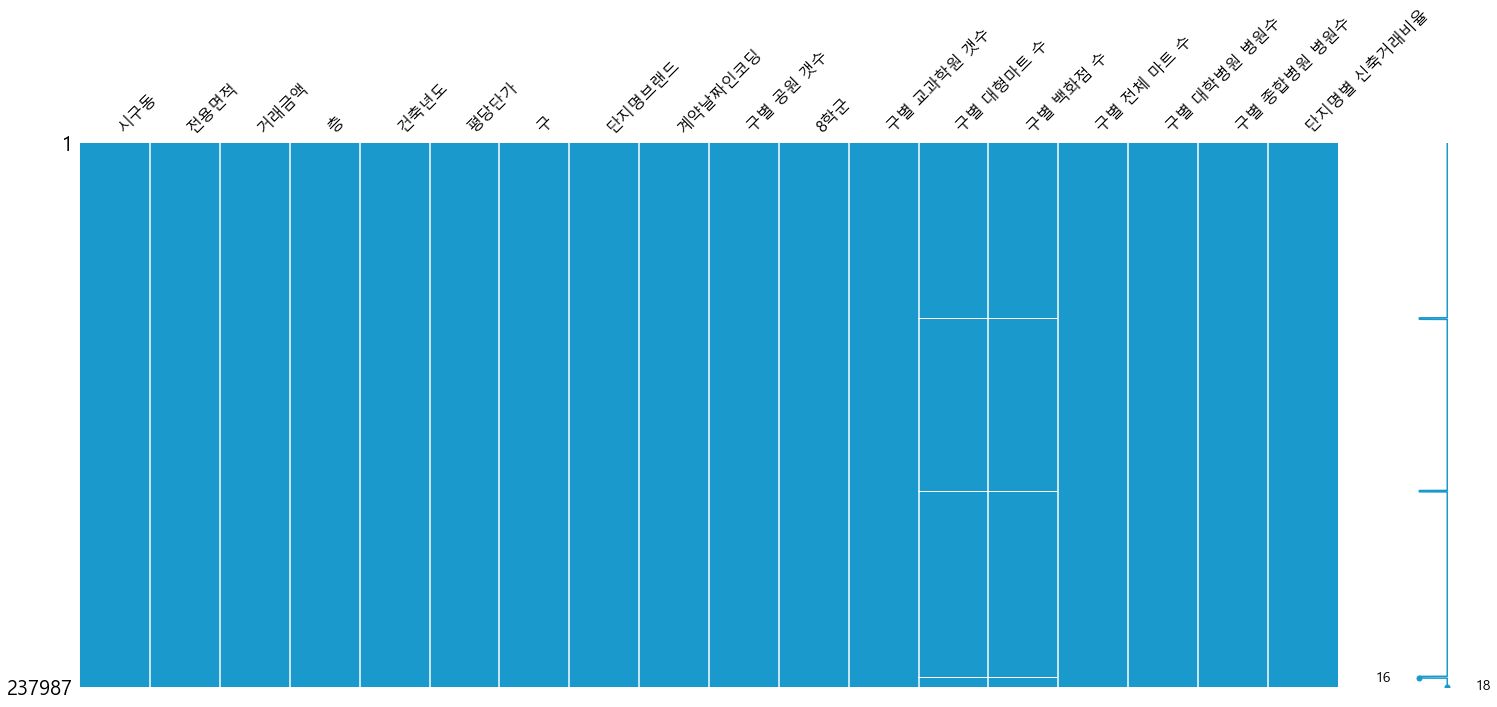

In [118]:
import missingno as msno
msno.matrix(df=train_data.iloc[:, :], color=(0.1, 0.6, 0.8))

In [119]:
# 결측치 0으로 대체 -> 종로구에는 대형마트, 백화점 수가 없음.
train_data.fillna(0, inplace=True)

In [120]:
train_data.isna().sum()

시구동            0
전용면적           0
거래금액           0
층              0
건축년도           0
평당단가           0
구              0
단지명브랜드         0
계약날짜인코딩        0
구별 공원 갯수       0
8학군            0
구별 교과학원 갯수     0
구별 대형마트 수      0
구별 백화점 수       0
구별 전체 마트 수     0
구별 대학병원 병원수    0
구별 종합병원 병원수    0
단지명별 신축거래비율    0
dtype: int64

In [121]:
# 최종 저장
train_data.to_csv('train_data_onehot.csv', encoding='utf-8-sig',index=False)
print('train_data_final.csv, 최종저장되었습니다.')

train_data_final.csv, 최종저장되었습니다.


In [122]:
train_data.columns

Index(['시구동', '전용면적', '거래금액', '층', '건축년도', '평당단가', '구', '단지명브랜드', '계약날짜인코딩',
       '구별 공원 갯수', '8학군', '구별 교과학원 갯수', '구별 대형마트 수', '구별 백화점 수', '구별 전체 마트 수',
       '구별 대학병원 병원수', '구별 종합병원 병원수', '단지명별 신축거래비율'],
      dtype='object')

In [123]:
train_data

,시구동,전용면적,거래금액,층,건축년도,평당단가,구,단지명브랜드,계약날짜인코딩,구별 공원 갯수,8학군,구별 교과학원 갯수,구별 대형마트 수,구별 백화점 수,구별 전체 마트 수,구별 대학병원 병원수,구별 종합병원 병원수,단지명별 신축거래비율
0,서울특별시 강남구 개포동,79.97,130000,4,1987,5364.511692,강남구,기타,2,132.0,1,1304,1.0,6.0,7.0,4,33,0.110657
1,서울특별시 강남구 개포동,79.97,117000,2,1987,4828.060523,강남구,기타,7,132.0,1,1304,1.0,6.0,7.0,4,33,0.110657
2,서울특별시 강남구 개포동,79.97,130000,1,1987,5364.511692,강남구,기타,10,132.0,1,1304,1.0,6.0,7.0,4,33,0.110657
3,서울특별시 강남구 개포동,79.97,139500,2,1987,5756.533700,강남구,기타,77,132.0,1,1304,1.0,6.0,7.0,4,33,0.110657
4,서울특별시 강남구 개포동,54.98,107500,5,1987,6452.346308,강남구,기타,94,132.0,1,1304,1.0,6.0,7.0,4,33,0.110657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237982,서울특별시 중랑구 중화동,106.21,45400,6,2003,1410.601638,중랑구,기타,800,11.0,0,174,6.0,0.0,6.0,3,12,0.110657
237983,서울특별시 중랑구 중화동,67.57,26000,2,2003,1269.794287,중랑구,기타,949,11.0,0,174,6.0,0.0,6.0,3,12,0.110657
237984,서울특별시 중랑구 중화동,95.94,44000,6,2007,1513.445904,중랑구,현대,921,11.0,0,174,6.0,0.0,6.0,3,12,0.016495
237985,서울특별시 중랑구 중화동,100.17,54800,5,2007,1805.330937,중랑구,현대,1067,11.0,0,174,6.0,0.0,6.0,3,12,0.016495
